# Исследование стартапов

Автор: Екатерина Лощинская

Дата: 13.02.2025

## Цели и задачи проекта

Цель:

- провести предобработку и анализ исторических данных о стартапах для последующего использования данных при покупке, развитии и перепродаже перспективных стартапов.


Задачи:

- подготовить датасет;

- провести предобработку данных;

- выявить, какие данные имеют значимость для принятия бизнес-решений.



## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов, с которыми проводится работа:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv


### 1.1. Вывод общей информации, исправление названия столбцов


Выведем информацию, которая необходима для принятия решений о предобработке, для каждого из датасетов.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Выгружаем данные в переменные
acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
#Выгружаем в переменные дополнительные таблицы
fund_extra = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment_extra = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

Последовательно познакомимся с данными датасетов — выведем первые строки методом head(), а информацию о датафрейме методом info():

In [3]:
display(company_and_rounds.info())
display(company_and_rounds.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

None

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Таблица company and rounds содержит 217774 строки, 22 столбца, включает типы данных float и object. Не везде типы данных выглядят подходящими (например, для id компании), потребуется дальнейшее преобразование типа данных. Столбцы сильно отличаются по количеству пропусков. Возможно, это объясняется тем, что данный датасет изначально был получен при объединении разных таблиц.

In [4]:
display(acquisition.info())
display(acquisition.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


None

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


Таблица acquisition содержит 9407 строки, 6 столбцов, включает типы данных int и object. Пропуски встречаются в двух столбцах.

In [5]:
display(degrees.info())
display(degrees.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


None

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Таблица degrees содержит 109610 строки, 4 столбца, включает типы данных int и object. Пропуски встречаются в двух столбцах. 

In [6]:
display(education.info())
display(education.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


None

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


Таблица education содержит 109610 строки, 4 столбца, включает типы данных int и object. Пропуски встречаются в двух столбцах.

In [7]:
display(people.info())
display(people.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


None

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


Таблица people содержит 226709 строки, 5 столбцов, включает типы данных float, int и object. Пропуски встречаются в 4 столбцах.

In [8]:
display(fund_extra.info())
display(fund_extra.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


None

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


Таблица fund_extra содержит 11652  строки, 9 столбцов, включает типы данных int и object. Пропуски встречаются в 5 столбцах.

In [9]:
display(investment_extra.info())
display(investment_extra.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


None

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


Таблица investment_extra содержит 61403 строки, 4 столбца, включает тип данных int. Пропусков нет.

Проверим написание названий столбцов в датафреймах.

In [10]:
display(acquisition.columns)

Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

In [11]:
display(company_and_rounds.columns)

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [12]:
# Переименуем столбцы с одинаковым названием company id 
#и сразу при создании словаря приведем написание к стилю snake case 
company_and_rounds = company_and_rounds.rename(columns={'company  ID': 'company_id',
                                  'name': 'name',
                                  'category  code': 'category_code',
                                  'status': 'status',
                                  'founded  at': 'founded_at',
                                  'closed  at': 'closed_at',
                                  'domain': 'domain',
                                  'network  username': 'network_username',
                                  'country  code': 'country_code',
                                  'investment  rounds': 'investment_rounds',
                                  'funding  rounds': 'funding_rounds',
                                  'funding  total': 'funding_total',
                                  'milestones': 'milestones',
                                  'funding  round  id': 'funding_round_id',
                                  'company  id': 'company_id_number',
                                 'funded  at': 'funded_at',
                                 'funding  round  type': 'funding_round_type',
                                 'raised  amount': 'raised_amount',
                                 'pre  money  valuation': 'pre_money_valuation',
                                 'participants': 'participants',
                                 'is  first  round': 'is_first_round',
                                 'is  last  round': 'is_last_round'})

In [13]:
display(degrees.columns)

Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

In [14]:
display(education.columns)

Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

In [15]:
display(people.columns)

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

In [16]:
display(fund_extra.columns)

Index(['id', 'name', 'founded_at', 'domain', 'network_username',
       'country_code', 'investment_rounds', 'invested_companies',
       'milestones'],
      dtype='object')

In [17]:
display(investment_extra.columns)

Index(['id', 'funding_round_id', 'company_id', 'fund_id'], dtype='object')

В других таблицах изменений названий столбцов не потребовалось.

### 1.2. Смена типов и анализ пропусков

Обработаем типы данных в столбцах, которые хранят значения даты и времени.

In [18]:
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'])
display(acquisition.dtypes)

id                               int64
acquiring_company_id             int64
acquired_company_id              int64
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object

In [19]:
company_and_rounds['founded_at'] = pd.to_datetime(company_and_rounds['founded_at'])
company_and_rounds['closed_at'] = pd.to_datetime(company_and_rounds['closed_at'])
company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'])
display(company_and_rounds.dtypes)

company_id                    float64
name                           object
category_code                  object
status                         object
founded_at             datetime64[ns]
closed_at              datetime64[ns]
domain                         object
network_username               object
country_code                   object
investment_rounds             float64
funding_rounds                float64
funding_total                 float64
milestones                    float64
funding_round_id              float64
company_id_number             float64
funded_at              datetime64[ns]
funding_round_type             object
raised_amount                 float64
pre_money_valuation           float64
participants                  float64
is_first_round                float64
is_last_round                 float64
dtype: object

In [20]:
education['graduated_at'] = pd.to_datetime(education['graduated_at'])
display(education.dtypes)

id                       int64
person_id                int64
instituition            object
graduated_at    datetime64[ns]
dtype: object

In [21]:
fund_extra['founded_at'] = pd.to_datetime(fund_extra['founded_at'])
display(fund_extra.dtypes)

id                             int64
name                          object
founded_at            datetime64[ns]
domain                        object
network_username              object
country_code                  object
investment_rounds              int64
invested_companies             int64
milestones                     int64
dtype: object

Потребовалось преобразовать тип данных в datetime64 в 6 столбцах, содержащих информацию о дате и времени.


Проверим количество дубликатов и пропусков в датафреймах.

In [22]:
dataframes = {
    'acquisition': acquisition,
    'company_and_rounds': company_and_rounds,
    'degrees': degrees,
    'education': education,
    'people': people,
    'fund_extra': fund_extra,
    'investment_extra': investment_extra
}

for name, df in dataframes.items():
    duplicates=df.duplicated().sum()
    display (f'Количество дубликатов в датасете {name}: {duplicates}')
 


'Количество дубликатов в датасете acquisition: 0'

'Количество дубликатов в датасете company_and_rounds: 0'

'Количество дубликатов в датасете degrees: 0'

'Количество дубликатов в датасете education: 0'

'Количество дубликатов в датасете people: 0'

'Количество дубликатов в датасете fund_extra: 0'

'Количество дубликатов в датасете investment_extra: 0'

Явные дубликаты не обнаружены ни в одной из таблиц.

In [23]:
for name, df in dataframes.items():
    sum_nulls = (df.isna().sum()).sort_values(ascending=False)
    prcnt_nulls = (df.isna().sum() / df.shape[0]).sort_values(ascending=False)
    display (f'Абсолютное количество пропусков в датасете {name}')
    display (sum_nulls)
    display (f'Относительное количество пропусков в датасете {name}')
    display (prcnt_nulls)

'Абсолютное количество пропусков в датасете acquisition'

term_code               7576
acquired_at               29
id                         0
acquiring_company_id       0
acquired_company_id        0
price_amount               0
dtype: int64

'Относительное количество пропусков в датасете acquisition'

term_code               0.805358
acquired_at             0.003083
id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
price_amount            0.000000
dtype: float64

'Абсолютное количество пропусков в датасете company_and_rounds'

closed_at              214325
funded_at              165094
is_last_round          164846
is_first_round         164846
participants           164846
pre_money_valuation    164846
raised_amount          164846
funding_round_type     164846
funding_round_id       164846
company_id_number      164846
network_username       122240
country_code           109167
founded_at             107818
category_code           73888
domain                  70615
company_id                302
milestones                302
name                      302
funding_rounds            302
investment_rounds         302
status                    302
funding_total             302
dtype: int64

'Относительное количество пропусков в датасете company_and_rounds'

closed_at              0.984162
funded_at              0.758098
is_last_round          0.756959
is_first_round         0.756959
participants           0.756959
pre_money_valuation    0.756959
raised_amount          0.756959
funding_round_type     0.756959
funding_round_id       0.756959
company_id_number      0.756959
network_username       0.561316
country_code           0.501286
founded_at             0.495091
category_code          0.339288
domain                 0.324258
company_id             0.001387
milestones             0.001387
name                   0.001387
funding_rounds         0.001387
investment_rounds      0.001387
status                 0.001387
funding_total          0.001387
dtype: float64

'Абсолютное количество пропусков в датасете degrees'

subject        28312
degree_type    11218
id                 0
object_id          0
dtype: int64

'Относительное количество пропусков в датасете degrees'

subject        0.258298
degree_type    0.102345
id             0.000000
object_id      0.000000
dtype: float64

'Абсолютное количество пропусков в датасете education'

graduated_at    51556
instituition       55
id                  0
person_id           0
dtype: int64

'Относительное количество пропусков в датасете education'

graduated_at    0.470359
instituition    0.000502
id              0.000000
person_id       0.000000
dtype: float64

'Абсолютное количество пропусков в датасете people'

company_id          192094
network_username    187842
first_name               5
last_name                1
id                       0
dtype: int64

'Относительное количество пропусков в датасете people'

company_id          0.847315
network_username    0.828560
first_name          0.000022
last_name           0.000004
id                  0.000000
dtype: float64

'Абсолютное количество пропусков в датасете fund_extra'

network_username      9503
founded_at            7047
country_code          4599
domain                4290
name                     2
id                       0
investment_rounds        0
invested_companies       0
milestones               0
dtype: int64

'Относительное количество пропусков в датасете fund_extra'

network_username      0.815568
founded_at            0.604789
country_code          0.394696
domain                0.368177
name                  0.000172
id                    0.000000
investment_rounds     0.000000
invested_companies    0.000000
milestones            0.000000
dtype: float64

'Абсолютное количество пропусков в датасете investment_extra'

id                  0
funding_round_id    0
company_id          0
fund_id             0
dtype: int64

'Относительное количество пропусков в датасете investment_extra'

id                  0.0
funding_round_id    0.0
company_id          0.0
fund_id             0.0
dtype: float64

Company_and_rounds - самая объемная таблица. Только в 7 столбцах из 22 нет пропусков. Максимальное количество пропусков в столбце closed_at - 98%. В 9 столбцах, содержащих информацию о раундах финансирования, доля пропусков одинаковая - 76%. Это также указывает на то, что таблица, вероятно, является результатом объединения двух таблиц. 

В других таблицах не такое большое количество пропусков. В таблице acquisition пропуски содержит только столбец term_code - 81%. Полнота данных в других таблицах: 

degrees - 10% пропусков в типе образования, 25% - в специальности; 

education - 47% пропусков в дате получения образования;

people - 82-84% пропусков в информации о нике в социальных сетях и id компании. 

В дополнительной таблице investment_extra нет пропусков, в таблице fund_extra пропуски в 4 столбцах, от 37 до 81%.



## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам



Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.



In [24]:
#Выделим год финансирования
company_and_rounds['year'] = company_and_rounds['funded_at'].dt.year
company_and_rounds['year'] = company_and_rounds['year'].astype('Int64')
display(company_and_rounds.head())



,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id_number,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>


In [25]:
#Создадим сводную таблицу
pivot_years_funds = pd.pivot_table(company_and_rounds, 
                                   values=['raised_amount','funding_rounds'], 
                                   index='year',
                                  aggfunc={'raised_amount': 'median',
                                          'funding_rounds': 'sum'},
                                   fill_value=0)
#Оставим только года с количеством раундов финансирования более 50
filtered_pivot_years_funds = pivot_years_funds[(pivot_years_funds['funding_rounds'] > 50)] 

display(filtered_pivot_years_funds)

    
    

,funding_rounds,raised_amount
year,,
1998,72,100000
1999,268,2000000
2000,403,4200000
2001,302,3000000
2002,385,4200000
2003,569,3000000
2004,1057,5000000
2005,4157,5500000
2006,6295,5000000


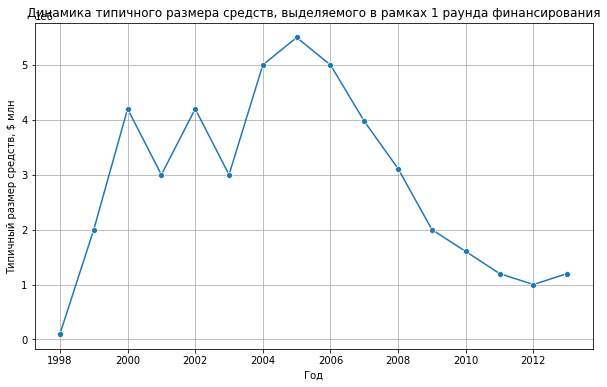

In [26]:
#Плстроим график
plt.figure(figsize= (10, 6))
sns.lineplot(data=filtered_pivot_years_funds, 
             x="year", 
             y="raised_amount",
            marker = 'o')
plt.ylabel('Типичный размер средств, $ млн')
plt.xlabel('Год')
plt.title('Динамика типичного размера средств, выделяемого в рамках 1 раунда финансирования')
plt.grid()
plt.show()

Максимальный типичный размер средств, собранных в рамках одного раунда, отмечен для 2005 года - $5500000. 
После 2012 года наблюдалась тенденция по увеличению размера выделяемых средств и уменьшению количества раундов финансирования.



### 2.2. Люди и их образование


Оценим, насколько информация об образовании сотрудников полна. 

In [27]:
#Используем датасеты people.csv и education.csv
display(people.head())
display(education.head())

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaT
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaT


In [28]:
#Объединим датасеты
employee_education = people.merge(education, left_on='id', right_on='person_id', how='left')
employee_education['no_edu_info']=employee_education['instituition'].isna().astype(int)
display (employee_education.head())
display (employee_education.dtypes)

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,no_edu_info
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,0
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,1
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,1
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,1
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,1


id_x                         int64
first_name                  object
last_name                   object
company_id                 float64
network_username            object
id_y                       float64
person_id                  float64
instituition                object
graduated_at        datetime64[ns]
no_edu_info                  int64
dtype: object

Разделим все компании на группы по количеству сотрудников и определим среднюю долю сотрудников без информации об образовании в каждой из групп

In [29]:
#Считаем общее количество сотрудников и число сотрудников без информации об образовании
employee_number=employee_education.groupby('company_id').agg({
    'id_x': 'nunique',
    'no_edu_info':'sum'})
                 
employee_number=employee_number.reset_index()
#Доля сотрудников без информации об образовании
employee_number['no_edu_share']=(employee_number['no_edu_info']/employee_number['id_x'])*100
display(employee_number.head())




,company_id,id_x,no_edu_info,no_edu_share
0,1.0,2,1,50.000000
1,2.0,1,0,0.000000
2,3.0,3,1,33.333333
3,4.0,13,1,7.692308
4,5.0,61,16,26.229508


In [30]:
#Проводим категоризацию
def categorize(value):
    if value == 1:
        return 'ИП'
    elif 1 < value <= 15:
        return 'Микропредприятие'
    elif 15 < value <= 100:
        return 'Малое предприятие'
    elif 100 < value <= 200:
        return 'Среднее предприятие'
    elif 200 < value:
        return 'Крупное предприятие'


employee_number['category'] = employee_number['id_x'].apply(categorize)
display(employee_number.head())

,company_id,id_x,no_edu_info,no_edu_share,category
0,1.0,2,1,50.000000,Микропредприятие
1,2.0,1,0,0.000000,ИП
2,3.0,3,1,33.333333,Микропредприятие
3,4.0,13,1,7.692308,Микропредприятие
4,5.0,61,16,26.229508,Малое предприятие


In [31]:
display(employee_number['category'].unique())
display(employee_number['category'].nunique())
display(employee_number['id_x'].max())

array(['Микропредприятие', 'ИП', 'Малое предприятие',
       'Среднее предприятие', 'Крупное предприятие'], dtype=object)

5

244

In [32]:
#Считаем среднюю долю сотрудников без указания образования по категориям
grouped_companies = employee_number.groupby('category').agg({
    'company_id': 'count',
    'no_edu_share':'mean'})
grouped_companies = grouped_companies.reset_index()
display(grouped_companies.head())

,category,company_id,no_edu_share
0,ИП,18117,46.337694
1,Крупное предприятие,1,31.147541
2,Малое предприятие,43,39.582677
3,Микропредприятие,4759,48.037192
4,Среднее предприятие,2,26.739130


,category,company_id,no_edu_share
4,Среднее предприятие,2,26.739130
1,Крупное предприятие,1,31.147541
2,Малое предприятие,43,39.582677
0,ИП,18117,46.337694
3,Микропредприятие,4759,48.037192


<Figure size 720x432 with 0 Axes>

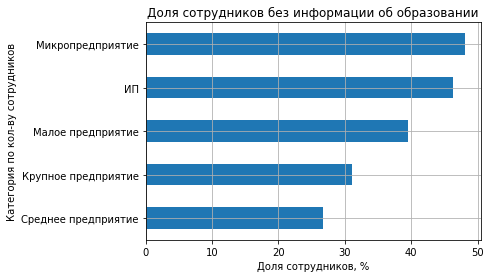

In [33]:
grouped_companies = grouped_companies.sort_values(by='no_edu_share',ascending=True)
display(grouped_companies)


plt.figure(figsize= (10, 6))
grouped_companies.plot(kind='barh', x='category', y='no_edu_share', legend=False) 

plt.ylabel('Категория по кол-ву сотрудников')
plt.xlabel('Доля сотрудников, %')
plt.title('Доля сотрудников без информации об образовании')
plt.grid()
plt.show()

In [34]:

#Оценим, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.
display(degrees.head())

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [35]:
#Для присоединения таблицы degrees нужно убрать префикс в идентификаторе сотрудника
degrees['person_id']=degrees['object_id'].str.replace('p:','')
degrees['person_id'] = degrees['person_id'].astype('int64')
display (degrees.head())
display (degrees.dtypes)

,id,object_id,degree_type,subject,person_id
0,1,p:6117,MBA,NaN,6117
1,2,p:6136,BA,"English, French",6136
2,3,p:6136,MS,Mass Communication,6136
3,4,p:6005,MS,Internet Technology,6005
4,5,p:5832,BCS,"Computer Science, Psychology",5832


id              int64
object_id      object
degree_type    object
subject        object
person_id       int64
dtype: object

In [36]:
#Присоединим информацию о типе образования к датафрейму с информацией об образовании сотрудников
employee_degrees = employee_education.merge(degrees, left_on='id_x', right_on='person_id', how='left')
display(employee_degrees.head())

,id_x,first_name,last_name,company_id,network_username,id_y,person_id_x,instituition,graduated_at,no_edu_info,id,object_id,degree_type,subject,person_id_y
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,0,2415.0,p:10,NaN,Computer Science,10.0
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,1,NaN,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,1,NaN,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,1,NaN,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,1,NaN,NaN,NaN,NaN,NaN


Таблицы peolple и education были объединены по идентификатору сотрудника. 

Категоризация компаний по количеству сотрудников проведена по официальным критериям размера предприятия:

- до 15 сотрудников, микропредприятие

- до 100, малое предприятие

- до 200, среднее предприятие

- более 200, крупное предприятие.

В отдельную категорию вынесены компании, в которых числится 1 сотрудник, то есть индивидуальные предприниматели (ИП).

Максимальная доля сотрудников без указания образования характерна для категорий Микропредприятия (48%) и ИП(46%). 

При необходимости дополнить информацию об образовании сотрудников возможно объединение таблиц people, education, degrees по идентификатору сотрудника.

### 2.3. Объединять или не объединять — вот в чём вопрос



Установим, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах.

In [37]:
#Отобразим первые строки таблиц, чтобы выделить, в каких таблицах встречается столбец network_username
dataframes = {
    'acquisition': acquisition,
    'company_and_rounds': company_and_rounds,
    'degrees': degrees,
    'education': education,
    'people': people,
    'fund_extra': fund_extra,
    'investment_extra': investment_extra
}

for name, df in dataframes.items():
    display (name)
    display (df.head())

'acquisition'

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


'company_and_rounds'

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id_number,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>


'degrees'

,id,object_id,degree_type,subject,person_id
0,1,p:6117,MBA,NaN,6117
1,2,p:6136,BA,"English, French",6136
2,3,p:6136,MS,Mass Communication,6136
3,4,p:6005,MS,Internet Technology,6005
4,5,p:5832,BCS,"Computer Science, Psychology",5832


'education'

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaT
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaT


'people'

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


'fund_extra'

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaT,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaT,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaT,NaN,NaN,NaN,0,0,1


'investment_extra'

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


Отобразим, как выглядят уникальные значения network_username в разных таблицах.

In [38]:
display(company_and_rounds['network_username'].unique())

array(['BachelrWetpaint', nan, 'Hostnine', ..., 'networkzend',
       'pPhotonet', 'Photonet'], dtype=object)

In [39]:
display(people['network_username'].unique())

array([nan, 'jobsbostontech', 'fbroulette', ..., 'itechsocialnet',
       'socialnethubs', 'esocialnetlike'], dtype=object)

In [40]:
display(fund_extra['network_username'].unique())

array([nan, 'greylockvc', 'imi_vc', ..., 'CalSTRS', 'haystack_fund',
       'fbFund'], dtype=object)

Отобразим пропуски в таблицах.

In [41]:
dataframes = {
    'company_and_rounds': company_and_rounds,
    'fund_extra': fund_extra}

for name, df in dataframes.items():
    sum_nulls = df.isna().sum()
    prcnt_nulls = df.isna().sum() / df.shape[0]
    display (f'Абсолютное количество пропусков в датасете {name}')
    display (sum_nulls)
    display (f'Относительное количество пропусков в датасете {name}')
    display (prcnt_nulls)

'Абсолютное количество пропусков в датасете company_and_rounds'

company_id                302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id_number      164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
year                   165094
dtype: int64

'Относительное количество пропусков в датасете company_and_rounds'

company_id             0.001387
name                   0.001387
category_code          0.339288
status                 0.001387
founded_at             0.495091
closed_at              0.984162
domain                 0.324258
network_username       0.561316
country_code           0.501286
investment_rounds      0.001387
funding_rounds         0.001387
funding_total          0.001387
milestones             0.001387
funding_round_id       0.756959
company_id_number      0.756959
funded_at              0.758098
funding_round_type     0.756959
raised_amount          0.756959
pre_money_valuation    0.756959
participants           0.756959
is_first_round         0.756959
is_last_round          0.756959
year                   0.758098
dtype: float64

'Абсолютное количество пропусков в датасете fund_extra'

id                       0
name                     2
founded_at            7047
domain                4290
network_username      9503
country_code          4599
investment_rounds        0
invested_companies       0
milestones               0
dtype: int64

'Относительное количество пропусков в датасете fund_extra'

id                    0.000000
name                  0.000172
founded_at            0.604789
domain                0.368177
network_username      0.815568
country_code          0.394696
investment_rounds     0.000000
invested_companies    0.000000
milestones            0.000000
dtype: float64

Столбец network_username встречается в 3 таблицах: company_and_rounds, people, fund_extra. 

Эти столбцы содержат информацию  о разных типах ников в сети: ник компании в сети, ник сотрудника с социальных сетях и ник фонда. Таким образом, эти данные имеют различный смысл при одинаковом названии столбцов и не могут быть использованы для объединения данных. 




### 2.4. Проблемный датасет и причина возникновения пропусков


Приведем данные company_and_rounds.csv в вид, который позволяет проводить анализ в разрезе отдельных компаний. 


In [42]:
display(company_and_rounds.head())

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id_number,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>


In [43]:
#Разделим company_and_rounds на два датасета

#Информация о компаниях
company_df = company_and_rounds.loc[:,:'milestones']
#Удалим дубликаты
company_df = company_df.drop_duplicates()

#Информация о раундах финансирования
rounds_df = company_and_rounds[['funding_round_id','company_id_number','funded_at',
                                'funding_round_type','raised_amount',
                               'pre_money_valuation','participants',
                                'is_first_round','is_last_round']]
#Удаляем дубликаты
rounds_df = rounds_df.drop_duplicates()
display(company_df.head())
display(company_df.dtypes)
display(rounds_df.head())
display(rounds_df.dtypes)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0


company_id                  float64
name                         object
category_code                object
status                       object
founded_at           datetime64[ns]
closed_at            datetime64[ns]
domain                       object
network_username             object
country_code                 object
investment_rounds           float64
funding_rounds              float64
funding_total               float64
milestones                  float64
dtype: object

,funding_round_id,company_id_number,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
15,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0


funding_round_id              float64
company_id_number             float64
funded_at              datetime64[ns]
funding_round_type             object
raised_amount                 float64
pre_money_valuation           float64
participants                  float64
is_first_round                float64
is_last_round                 float64
dtype: object

In [44]:
#Идентификаторы компании и раундов финансирования приведем к целочисленному типу
company_df['company_id'] = company_df['company_id'].astype('Int64')
rounds_df['funding_round_id'] = rounds_df['funding_round_id'].astype('Int64')
rounds_df['company_id_number'] = rounds_df['company_id_number'].astype('Int64')
company_df = company_df.reset_index()
rounds_df = rounds_df.reset_index()

display(company_df.head())
display(rounds_df.head())


,index,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
2,4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
3,5,10000,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
4,6,10001,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0


,index,funding_round_id,company_id_number,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,0,888,1,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1,889,1,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,2,2312,1,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,3,<NA>,<NA>,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,15,1644,1001,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0


In [45]:
company_df = company_df.sort_values(by='company_id',ascending=True)
rounds_df = rounds_df.sort_values(by='funding_round_id',ascending=True)
display(f'Размер таблицы company_df:{company_df.shape}')
display(company_df.head())
display(f'Размер таблицы rounds_df:{rounds_df.shape}')
display(rounds_df.head())


'Размер таблицы company_df:(196554, 14)'

,index,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,3.975000e+07,5.0
57330,63280,2,AdventNet,enterprise,operating,1996-01-01,NaT,adventnet.com,manageengine,USA,0.0,0.0,0.000000e+00,0.0
142942,153920,3,Zoho,software,operating,2005-09-15,NaT,zoho.com,zoho,USA,0.0,0.0,0.000000e+00,5.0
151807,165414,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,4.500000e+07,8.0
196390,217286,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.0,11.0,2.425700e+09,5.0


'Размер таблицы rounds_df:(52929, 10)'

,index,funding_round_id,company_id_number,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
35273,165414,1,4,2006-12-01,series-b,8500000.0,0.0,2.0,0.0,0.0
52585,217286,2,5,2004-09-01,angel,500000.0,0.0,2.0,0.0,1.0
52586,217287,3,5,2005-05-01,series-a,12700000.0,115000000.0,3.0,0.0,0.0
52587,217288,4,5,2006-04-01,series-b,27500000.0,525000000.0,4.0,0.0,0.0
48229,202858,5,7299,2006-05-01,series-b,10500000.0,0.0,2.0,0.0,0.0


Большое количество столбцов, дублирующиеся столбцы с идентификатором компании и большое количество пропусков делали неудобным анализ таблицы company_and_rounds. Для дальнейшей обработки датафрейм company_and_rounds разделен на два, с информацией о компаниях и раундах финансирвоания по отдельности. Индекс компаний и раундов имели тип float64 и были приведены к целочисленному типу. Удалены явные дубликаты. Датафреймы отсортированы по идентификаторам компании и раундов финансирования.


## Шаг 3. Исследовательский анализ объединённых таблиц




### 3.1. Объединение данных

Проведем фильтрацию данных для ответа на вопросы заказчика, которые касаются интересующих его компаний. В качестве основы для объединённой таблицы взяты только те компании, у которых указаны значения funding_rounds или investment_rounds больше нуля, или те, у которых в колонке status указано acquired. 


In [46]:
#Фильтрация данных
companies_filtered = company_df[(company_df['funding_rounds'] > 0) | 
                                (company_df['investment_rounds'] > 0) |
                                (company_df['status'] == 'acquired')]
display(f'Размер датафрейма companies_filtered:{companies_filtered.shape}')

'Размер датафрейма companies_filtered:(40747, 14)'

In [47]:
#Оценим наличие пропусков
sum_nulls = (companies_filtered.isna().sum()).sort_values(ascending=False)
prcnt_nulls = (companies_filtered.isna().sum() / companies_filtered.shape[0]).sort_values(ascending=False)
print (f'Абсолютное количество пропусков:{sum_nulls}')
print (f'Абсолютное количество пропусков:{prcnt_nulls}')

Абсолютное количество пропусков:closed_at            38619
network_username     19897
founded_at           12940
country_code          6005
category_code         5432
domain                4993
index                    0
company_id               0
name                     0
status                   0
investment_rounds        0
funding_rounds           0
funding_total            0
milestones               0
dtype: int64
Абсолютное количество пропусков:closed_at            0.947775
network_username     0.488306
founded_at           0.317569
country_code         0.147373
category_code        0.133310
domain               0.122537
index                0.000000
company_id           0.000000
name                 0.000000
status               0.000000
investment_rounds    0.000000
funding_rounds       0.000000
funding_total        0.000000
milestones           0.000000
dtype: float64


После фильтрации данных о компаниях в датасете содержится 40747 строк, 14 столбцов. В таблице companies_filtered взяты только те компании, у которых указаны значения funding_rounds или investment_rounds больше нуля, или те, у которых в колонке status указано acquired. 8 столбцов не содержат пропусков (название и статус компании, информация о раундах и вехах финансирования и общем объеме финансирования. Максимальное количество пропусков (94%) в данных о дате закрытия компании, значит,  эти компании ещё не закрыты. Также пропущены данные в столбцах с категорией области деятельности компании, кодом страны, сайтом и ником компании в сети. Можно отметить, что пропущенные данные не являются обязательными для последующего анализа. В столбцах, которые важны для анализа истории финансирования стартапов (статус компании, число раундов финансирования, общий размер финансирования, вехи финансирования, инвестиционные раунды) - пропусков нет.


### 3.2. Анализ выбросов



Проанализируем обычный для рассматриваемого периода размер средств (funding_total), который предоставлялся компаниям.

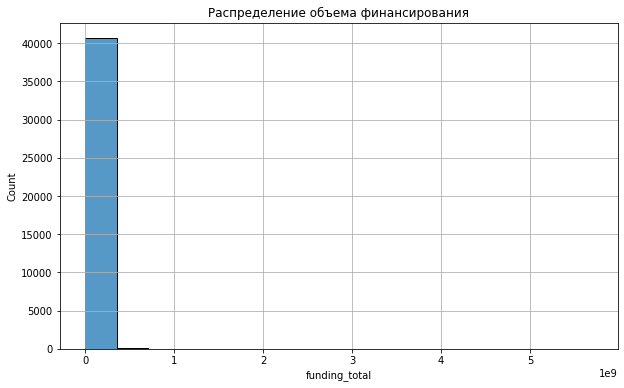

In [48]:
companies_filtered['funding_total']
plt.figure(figsize=(10, 6))
sns.histplot(data=companies_filtered, x='funding_total', bins=16)
plt.title('Распределение объема финансирования')
plt.grid()
plt.show()

In [49]:
print(companies_filtered['funding_total'].min())

0.0


По гистограмме видно, что в таблице представлено значительное количество компаний с нулевым объемом финансирования. Отфильтруем нулевые значения, чтобы нагляднее отобразить как распределяются значения объема финансирвоания.

In [50]:
funding_total_df = companies_filtered[(companies_filtered['funding_total'] > 0)]

In [51]:
print('Статистические показатели столбца funding_total')
print(funding_total_df['funding_total'].describe())
print(funding_total_df['funding_total'].quantile(0.99))

Статистические показатели столбца funding_total
count    2.787400e+04
mean     1.481652e+07
std      6.775936e+07
min      2.910000e+02
25%      5.000000e+05
50%      2.564500e+06
75%      1.100000e+07
max      5.700000e+09
Name: funding_total, dtype: float64
175087750.00000015


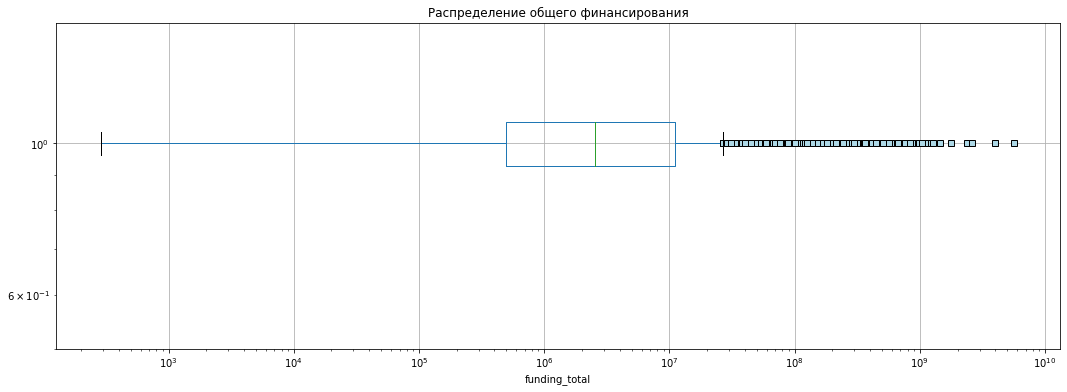

In [52]:
# Построим диаграмму разброса 
plt.figure(figsize=(18, 6))
boxplot = funding_total_df.boxplot(column='funding_total', vert=False, 
                                     showfliers=True,figsize=(10, 5),
                                     flierprops=dict(markerfacecolor='lightblue', marker='s'))
plt.xscale('log')
plt.yscale('log') 
boxplot.set_title('Распределение общего финансирования')
boxplot.set_xlabel('funding_total')
plt.show()

По описательным статистикам и диаграмме размаха столбца funding total можно отметить, что максимальное значение очень сильно выбивается (5.7 млрд).

Проведем фильтрацию по 99 процентилю, чтобы отсечь экстремальные значения.

In [53]:
outliers = funding_total_df['funding_total'].quantile(0.99)
new_df = funding_total_df.loc[funding_total_df['funding_total'] < outliers]
print(new_df['funding_total'].describe())


count    2.759500e+04
mean     1.074443e+07
std      2.090958e+07
min      2.910000e+02
25%      5.000000e+05
50%      2.500000e+06
75%      1.040000e+07
max      1.750000e+08
Name: funding_total, dtype: float64


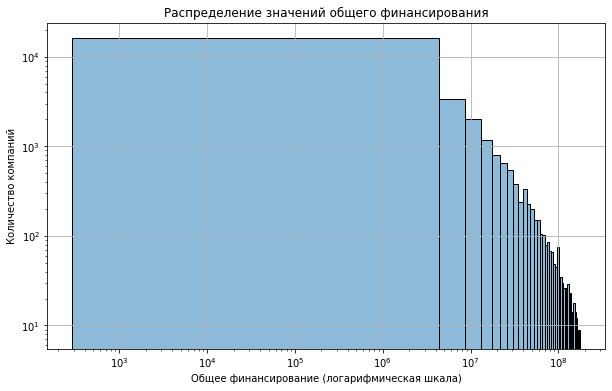

In [54]:
# Построим гистограмму, используем логарифмичсекие шкалы для наглядности отображения
plt.figure(figsize=(10, 6))
sns.histplot(data=new_df, x='funding_total', bins=40, alpha=0.5)
plt.title('Распределение значений общего финансирования')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Общее финансирование (логарифмическая шкала)')
plt.ylabel('Количество компаний')
plt.grid()
plt.show()



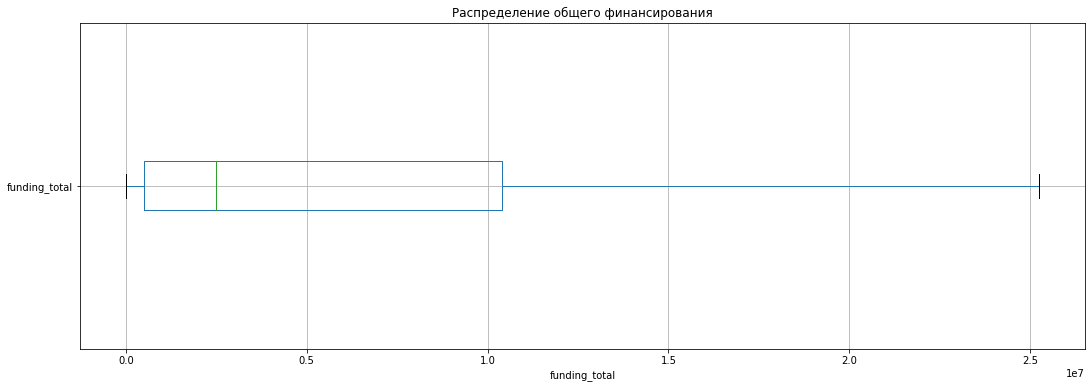

In [55]:
#Построим диаграмму размаха после фильтрации аномальных значений
plt.figure(figsize=(18, 6))
boxplot = new_df.boxplot(column='funding_total', vert=False, showfliers=False,figsize=(10, 5),
                        flierprops=dict(markerfacecolor='lightblue', marker='s'))
                     

boxplot.set_title('Распределение общего финансирования')
boxplot.set_xlabel('funding_total')
plt.show()

In [56]:
iqr = new_df['funding_total'].quantile(0.75)-new_df['funding_total'].quantile(0.25) 
display(iqr)
l_threshold = new_df['funding_total'].quantile(0.25) - 1.5 * iqr
u_threshold = new_df['funding_total'].quantile(0.75) + 1.5 * iqr
display(f'Нижний порог выбросов:{l_threshold}')
display(f'Верхний порог выбросов:{u_threshold}')

9900000.0

'Нижний порог выбросов:-14350000.0'

'Верхний порог выбросов:25250000.0'

In [57]:
print(new_df['funding_total'].median())

2500000.0


По предобработанному столбцу funding_total рассчитаны пороги выбросов с использованием межквартильного размаха IQR. Нижний порог на диаграмме размаха приближается к 0 (отрицательное значение нижнего порога, рассчитанное по формуле, мы не берем в расчет, так как финансирование не может быть отрицательным). 
Верхний порог значений составляет $ 25 250 000,
значения выше этого можно считать выбросами. 

Типичный размер финансирования одной компании (медиана) составляет $ 2 500 000.

По статистическим показателям, возвращаемым методом .describe(), мы видим, что разброс данных об объеме финансирования чрезвычайно большой. Вероятно, размер компаний и их финансирования различается настолько сильно, что сложно описать данные стандартными методами описательной статистики. Для выделения типичных размеров финансирования, возможно, требуется предварительная категоризация компаний.


### 3.3. Куплены забесплатно?

Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.



In [58]:
#Присоединим информацию о покупках компаний
acquired_company_df = companies_filtered.merge(acquisition, left_on='company_id', right_on='acquired_company_id', how='left')
display(acquired_company_df.head())

,index,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,3.975000e+07,5.0,NaN,NaN,NaN,NaN,NaN,NaT
1,165414,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,4.500000e+07,8.0,7386.0,20953.0,4.0,NaN,500000.0,2012-07-12
2,217286,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.0,11.0,2.425700e+09,5.0,NaN,NaN,NaN,NaN,NaN,NaT
3,199822,7,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0.0,1.0,8.000000e+05,4.0,NaN,NaN,NaN,NaN,NaN,NaT
4,209255,8,Postini,web,acquired,1999-06-02,NaT,postini.com,NaN,USA,0.0,0.0,0.000000e+00,0.0,419.0,59.0,8.0,cash,625000000.0,2007-07-09


In [59]:
#Проводим филтьтрацию
bought_for_free = acquired_company_df[(acquired_company_df['price_amount'].isin([0,1]))&
    (acquired_company_df['funding_total'] > 0)]
display (bought_for_free.head())


,index,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
5,215846,9,Geni,web,acquired,2006-06-01,NaT,geni.com,geni,USA,0.0,3.0,16500000.0,4.0,7954.0,687.0,9.0,NaN,0.0,2012-11-28
9,5112,13,StumbleUpon,web,acquired,2002-02-01,NaT,stumbleupon.com,stumbleupon,USA,0.0,4.0,18500000.0,5.0,4283.0,20.0,13.0,NaN,0.0,2007-05-30
11,7893,14,Gizmoz,web,acquired,2003-01-01,NaT,gizmoz.com,NaN,USA,0.0,3.0,18100000.0,4.0,2692.0,37730.0,14.0,NaN,0.0,2009-12-15
19,92509,23,Joost,games_video,acquired,2006-10-01,NaT,joost.com,NaN,USA,0.0,1.0,45000000.0,5.0,2622.0,3396.0,23.0,NaN,0.0,2009-11-24
32,162929,38,Kyte,games_video,acquired,2006-12-01,NaT,kyte.com,kyte,USA,0.0,4.0,23350000.0,2.0,5075.0,475.0,38.0,NaN,0.0,2011-01-31


In [60]:
#Отобразим топ-10 компаний, с максимальном объемом финансирования, которые были куплены за 0 или 1 доллар
bought_for_free_10 = (bought_for_free.sort_values(by='funding_total',ascending=False)).head(10)
display(bought_for_free_10)

,index,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
4184,5517,13219,Clearwire,mobile,acquired,2003-10-01,NaT,clearwire.com,NaN,USA,0.0,4.0,5.700000e+09,2.0,8023.0,3827.0,13219.0,NaN,0.0,2012-12-17
20288,198092,68409,Fanatics,ecommerce,acquired,1995-01-01,NaT,fanaticsinc.com,Fans,USA,0.0,2.0,3.950000e+08,1.0,5133.0,28712.0,68409.0,NaN,0.0,2011-02-09
20289,198092,68409,Fanatics,ecommerce,acquired,1995-01-01,NaT,fanaticsinc.com,Fans,USA,0.0,2.0,3.950000e+08,1.0,8967.0,104020.0,68409.0,NaN,0.0,2011-06-01
10977,161511,36886,Horizon Wind Energy,cleantech,acquired,1998-01-01,NaT,horizonwind.com,NaN,USA,0.0,2.0,3.180000e+08,1.0,9976.0,272107.0,36886.0,NaN,0.0,2007-03-27
23059,213151,84079,Liberty Dialysis,health,acquired,NaT,NaT,libertydialysis.com,NaN,USA,0.0,1.0,3.149600e+08,1.0,5944.0,66855.0,84079.0,NaN,0.0,2011-08-02
10986,161547,36920,"RetailMeNot, Inc.",web,acquired,2007-05-01,NaT,retailmenot.com,retailmenotinc,USA,0.0,5.0,2.995000e+08,2.0,4468.0,36920.0,36920.0,NaN,0.0,2010-12-02
5245,38837,17511,Good Technology,mobile,acquired,1996-01-01,NaT,good.com,good_technology,USA,0.0,6.0,2.657440e+08,2.0,997.0,3008.0,17511.0,NaN,0.0,2009-02-23
10547,159581,35251,Landis+Gyr,cleantech,acquired,NaT,NaT,landisgyr.com,NaN,CHE,0.0,2.0,2.650000e+08,3.0,5548.0,30094.0,35251.0,NaN,0.0,2011-05-19
11835,164666,39347,Prometheus Laboratories,biotech,acquired,1995-01-01,NaT,prometheuslabs.com,NaN,USA,0.0,1.0,2.600000e+08,0.0,5568.0,77212.0,39347.0,NaN,0.0,2011-05-24
6878,106932,24346,Solar Power Partners,cleantech,acquired,NaT,NaT,solarpowerpartners.com,NRGsolar,USA,0.0,4.0,2.530000e+08,1.0,10095.0,22932.0,24346.0,NaN,0.0,2011-11-21


In [61]:
bought_for_free['funding_total'].describe()

count    1.618000e+03
mean     1.815296e+07
std      1.445030e+08
min      3.750000e+03
25%      2.000000e+06
50%      6.000000e+06
75%      1.550000e+07
max      5.700000e+09
Name: funding_total, dtype: float64

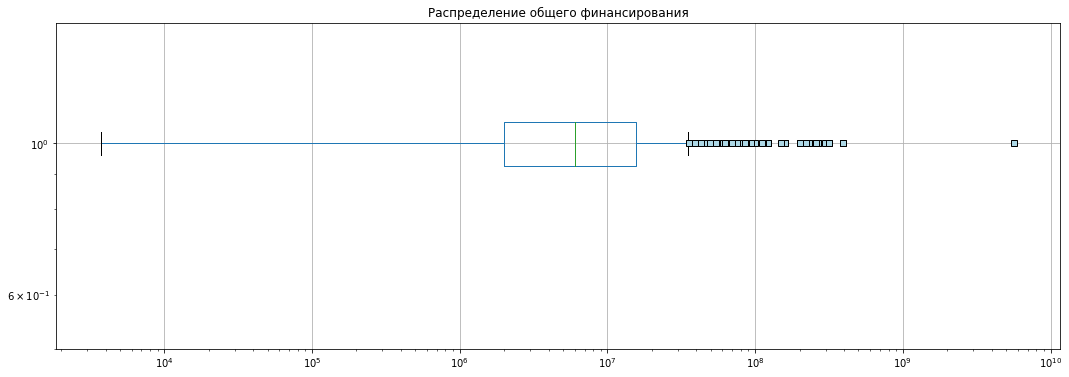

In [62]:
plt.figure(figsize=(18, 6))
boxplot = bought_for_free.boxplot(column='funding_total', vert=False, 
                                     showfliers=True,figsize=(10, 5),
                                     flierprops=dict(markerfacecolor='lightblue', marker='s'))
plt.xscale('log')
plt.yscale('log') 
boxplot.set_title('Распределение общего финансирования')

plt.show()

In [63]:
display(bought_for_free['funding_total'].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99]))

count    1.618000e+03
mean     1.815296e+07
std      1.445030e+08
min      3.750000e+03
25%      2.000000e+06
50%      6.000000e+06
75%      1.550000e+07
95%      5.148750e+07
99%      1.515529e+08
max      5.700000e+09
Name: funding_total, dtype: float64

In [64]:
iqr = bought_for_free['funding_total'].quantile(0.75)-bought_for_free['funding_total'].quantile(0.25) 
display(iqr)

13500000.0

In [65]:
l_threshold = bought_for_free['funding_total'].quantile(0.25) - 1.5 * iqr
u_threshold = bought_for_free['funding_total'].quantile(0.75) + 1.5 * iqr
if l_threshold < 0:
    l_threshold = 0
display(f'Нижний порог выбросов:{l_threshold}')
display(f'Верхний порог выбросов:{u_threshold}')


'Нижний порог выбросов:0'

'Верхний порог выбросов:35750000.0'

In [66]:
l_percentile = (bought_for_free['funding_total'] < l_threshold).mean()*100
u_percentile = 100 - (bought_for_free['funding_total'] > u_threshold).mean()*100
print(f'Нижняя граница выбросов, перцентиль:{l_percentile:.0f}%')
print(f'Верхняя граница выбросов, перцентиль:{u_percentile:.0f}%')

Нижняя граница выбросов, перцентиль:0%
Верхняя граница выбросов, перцентиль:91%


В компаниях, купленных за 0 или 1 доллар, рассчитаны нижняя и верхняя граница выбросов для данных об общем финансировании с использованием межквартильного размаха IQR. Нижний порог примем за 0 (отрицательное значение нижнего порога, рассчитанное по формуле, мы не берем в расчет, так как финансирование не может быть отрицательным). Верхний порог значений составляет $ 35 750 000. Эти значения соответстсвуют 0 и 91 процентилю. 


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Проведем категоризацию стартапов.

Проанализируем данные о стоимости стартапов.

In [67]:
acquired_company_df['price_amount'].describe()


count    9.390000e+03
mean     3.939881e+08
std      2.684624e+10
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.362550e+04
max      2.600000e+12
Name: price_amount, dtype: float64

In [68]:
acquired_company_df['price_amount'].isna().sum()

31500

In [69]:
acquired_company_df['price_amount'].isna().sum() / len(acquired_company_df['price_amount']) * 100

77.03595011005136

В данных о стоимости стартапов много пропусков данных (77%) и много значений с нулевой стоимостью.

In [70]:
display(acquired_company_df.shape)

(40890, 20)

In [71]:
#Отберем компании с ненулевой стоимостью
acquired_company_filtered = acquired_company_df[(acquired_company_df['price_amount'] > 0)]
display(acquired_company_filtered.shape)

(2473, 20)

In [72]:
display (acquired_company_filtered.head())

,index,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
1,165414,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,45000000.0,8.0,7386.0,20953.0,4.0,NaN,500000.0,2012-07-12
4,209255,8,Postini,web,acquired,1999-06-02,NaT,postini.com,NaN,USA,0.0,0.0,0.0,0.0,419.0,59.0,8.0,cash,625000000.0,2007-07-09
6,3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,1.0,11.0,10.0,NaN,20000000.0,2007-05-30
10,5112,13,StumbleUpon,web,acquired,2002-02-01,NaT,stumbleupon.com,stumbleupon,USA,0.0,4.0,18500000.0,5.0,5984.0,13.0,13.0,NaN,29000000.0,2009-04-01
14,43888,18,Lala,games_video,acquired,NaT,NaT,lala.com,NaN,USA,0.0,4.0,44150000.0,6.0,2657.0,1654.0,18.0,cash_and_stock,80000000.0,2009-12-05


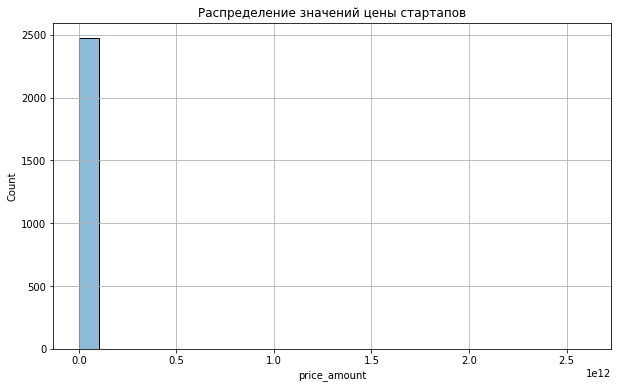

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(data=acquired_company_filtered, x='price_amount', bins=25, alpha=0.5)
plt.title('Распределение значений цены стартапов')
plt.grid()
plt.show()

Гистограмма по столбцу price amount имеет левоассимметричный вид, также по гистограмме и описательной статистике мы видим большой разброс данных о стоимости. 

In [74]:
acquired_company_filtered['price_amount'].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count    2.473000e+03
mean     1.495976e+09
std      5.230439e+10
min      1.000000e+00
25%      1.270000e+07
50%      5.600000e+07
75%      2.650000e+08
95%      1.801176e+09
99%      7.400000e+09
max      2.600000e+12
Name: price_amount, dtype: float64

In [75]:
#Уберем аномально высокие значения стоимости по 99 процентилю
outliers = acquired_company_filtered['price_amount'].quantile(0.99)
acquired_company_filtered = acquired_company_filtered.loc[acquired_company_filtered['price_amount'] < outliers]
print(acquired_company_filtered['price_amount'].describe())

count    2.446000e+03
mean     3.067373e+08
std      7.564805e+08
min      1.000000e+00
25%      1.202500e+07
50%      5.433000e+07
75%      2.500000e+08
max      7.200000e+09
Name: price_amount, dtype: float64


In [76]:
# Минимальное и максимальное значение после фильтрации
print(acquired_company_filtered['price_amount'].min())
print(acquired_company_filtered['price_amount'].max())

1.0
7200000000.0


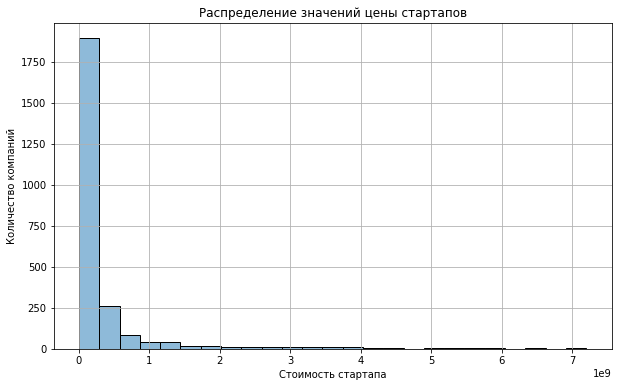

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(data=acquired_company_filtered, x='price_amount', bins=25, alpha=0.5)
plt.title('Распределение значений цены стартапов')
plt.xlabel('Стоимость стартапа')
plt.ylabel('Количество компаний')
plt.grid()
plt.show()

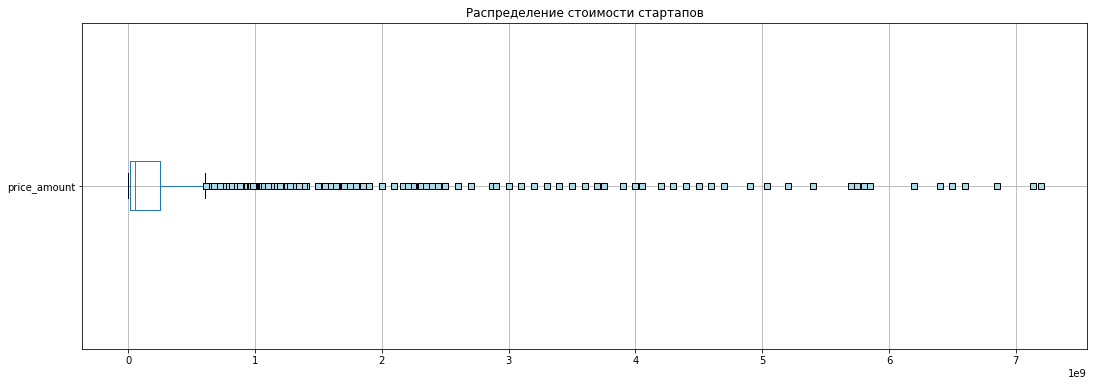

In [78]:
plt.figure(figsize=(18, 6))
boxplot = acquired_company_filtered.boxplot(column='price_amount', vert=False, 
                                     showfliers=True,figsize=(10, 5),
                                     flierprops=dict(markerfacecolor='lightblue', marker='s'))

boxplot.set_title('Распределение стоимости стартапов')

plt.show()

По диаграмме размаха мы видим, насколько разнообразны данные о стоимости стартапов. 
Проведем категоризацию по области деятельности стартапов.

In [79]:
#ВЫделим, какие категории стартапов по области деятельности встречаются в данных
print(acquired_company_df['category_code'].unique())

['web' 'news' 'social' 'network_hosting' 'games_video' 'music' 'mobile'
 'search' 'advertising' 'messaging' 'software' 'enterprise' 'security'
 'finance' 'hardware' 'public_relations' 'ecommerce' 'travel' 'medical'
 'real_estate' 'other' 'photo_video' 'semiconductor' 'consulting'
 'analytics' 'health' 'legal' 'sports' 'biotech' 'cleantech' 'education'
 'transportation' 'manufacturing' 'hospitality' 'fashion' 'nanotech'
 'nonprofit' 'automotive' nan 'design' 'local' 'pets' 'government']


In [80]:
#Посмотрим, как различается медиана стоимости стартапа по категориям
grouped_price = acquired_company_filtered.groupby('category_code').agg({
    'price_amount': 'median'})
grouped_price = grouped_price.reset_index()
grouped_price = grouped_price.sort_values(by='price_amount', ascending = False)

# Топ-5 категорий по стоимости стартапов
display(grouped_price.head())

,category_code,price_amount
2,automotive,2.400000e+09
33,sports,6.225000e+08
21,nanotech,5.840000e+08
27,real_estate,4.000000e+08
16,manufacturing,3.510000e+08


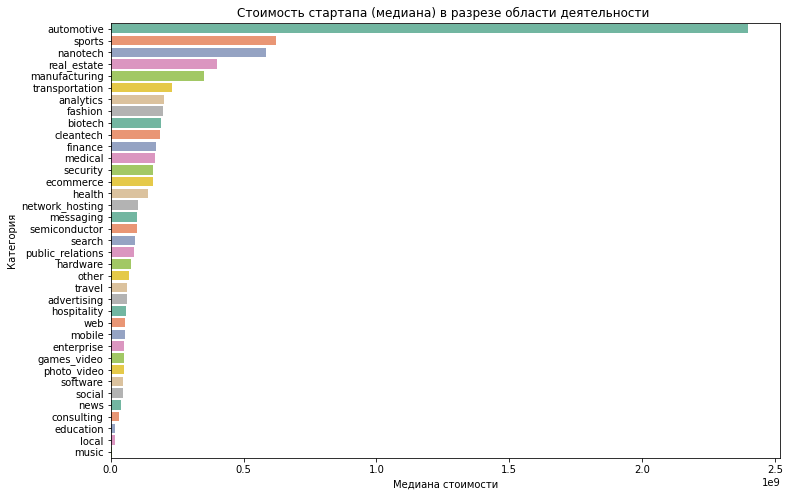

In [81]:
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_price, y = 'category_code', x = 'price_amount',
           palette='Set2')
plt.xlabel('Медиана стоимости')
plt.ylabel('Категория')
plt.title('Стоимость стартапа (медиана) в разрезе области деятельности ')
plt.show()

In [82]:
#Посмотрим, как различается разброс(стандартное отклонение) стоимости стартапа по категориям
grouped_std = acquired_company_filtered.groupby('category_code').agg({'price_amount':'std'})
grouped_std = grouped_std.reset_index()
grouped_std = grouped_std.sort_values(by='price_amount', ascending=False)

# Выведем топ-5 категорий по разбросу стоимости стартапов
display(grouped_std.head())

,category_code,price_amount
27,real_estate,2.676302e+09
2,automotive,2.581669e+09
13,health,1.927100e+09
30,semiconductor,1.122025e+09
16,manufacturing,1.060435e+09


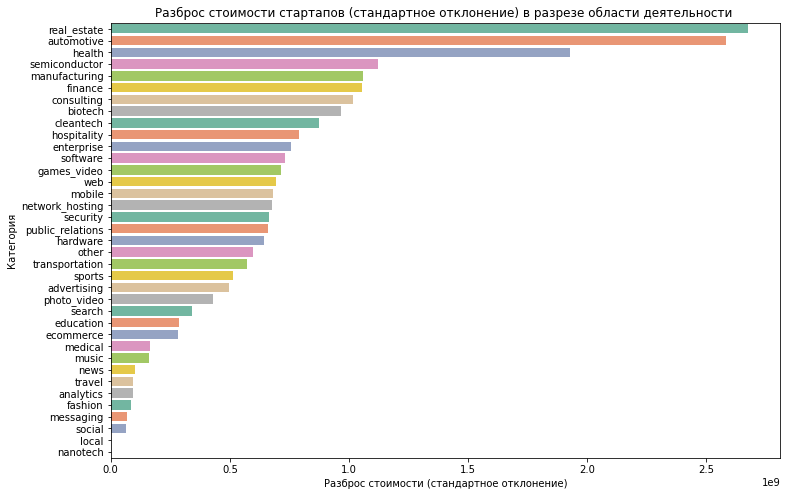

In [83]:
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_std, y = 'category_code', x = 'price_amount',
           palette='Set2')
plt.xlabel('Разброс стоимости (стандартное отклонение)')
plt.ylabel('Категория')
plt.title('Разброс стоимости стартапов (стандартное отклонение) в разрезе области деятельности ')
plt.show()

In [84]:
#Максимальная стоимость стартапа
grouped_max = acquired_company_filtered.groupby('category_code').agg({'price_amount':'max'})
grouped_max = grouped_max.reset_index()
grouped_max = grouped_max.sort_values(by='price_amount', ascending=False)

# Выведем топ-5 категорий по стоимости стартапов и размер получившейся после группировки таблицы
display(grouped_max.head())

,category_code,price_amount
3,biotech,7.133620e+09
27,real_estate,6.850000e+09
30,semiconductor,6.500000e+09
36,web,6.400000e+09
32,software,5.850000e+09


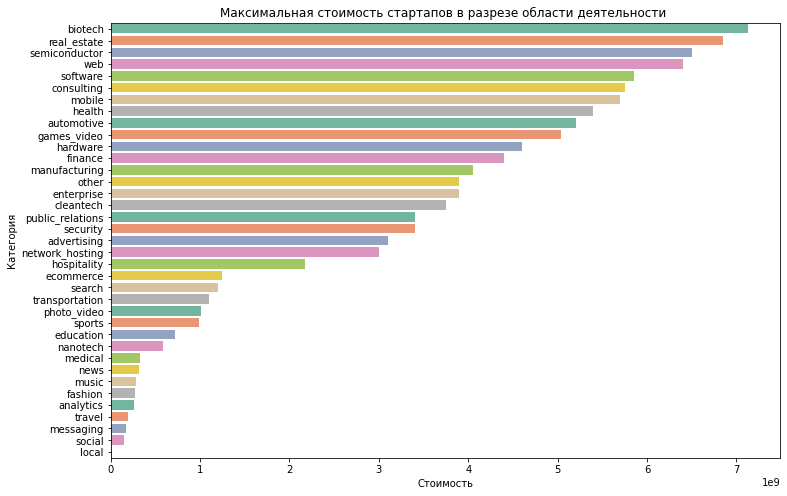

In [85]:
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_max, y = 'category_code', x = 'price_amount',
           palette='Set2')
plt.xlabel('Стоимость')
plt.ylabel('Категория')
plt.title('Максимальная стоимость стартапов в разрезе области деятельности ')
plt.show()

In [86]:
print('\nТоп-5 категорий компаний по типичной стоимости стартапа (медиана):')
display(grouped_price.head())
print('\nТоп-5 категорий компаний по разбросу данных о стоимости стартапа (стандартное отклонение):')
display(grouped_std.head())
print('\nТоп-5 категорий компаний по максимальной стоимости стартапа:')
display(grouped_max.head())


Топ-5 категорий компаний по типичной стоимости стартапа (медиана):


,category_code,price_amount
2,automotive,2.400000e+09
33,sports,6.225000e+08
21,nanotech,5.840000e+08
27,real_estate,4.000000e+08
16,manufacturing,3.510000e+08



Топ-5 категорий компаний по разбросу данных о стоимости стартапа (стандартное отклонение):


,category_code,price_amount
27,real_estate,2.676302e+09
2,automotive,2.581669e+09
13,health,1.927100e+09
30,semiconductor,1.122025e+09
16,manufacturing,1.060435e+09



Топ-5 категорий компаний по максимальной стоимости стартапа:


,category_code,price_amount
3,biotech,7.133620e+09
27,real_estate,6.850000e+09
30,semiconductor,6.500000e+09
36,web,6.400000e+09
32,software,5.850000e+09


Были выделены топ-5 категорий стартапов по области деятельности по типичной стоимости, разбросу стоимости и максимальной стоимости. Стартапы в области недвижимости входят в топ-5 по всем перечисленным показателям. К другим категориям с наибольшими медианными стоимостями стартапов входят также такие категрии как: автомобильная промышленность, спорт, нанотехнологии, производство. 

Максимальный разброс стоимости стартапов характерен также для недвижимости, автомобилей, производства, а также для стартапов в области здравоохранения и полупроводников.

Максимальные цены стартапов в областях: биотехнологии, недвижимость, полупроводники, веб, программное обеспечение.

In [87]:
#Проводим категоризацию
def categorize(value):
    if value < 1000000:
        return 'Малые'
    elif 1000000 < value <= 10000000:
        return 'Средние'
    elif 10000000 < value <= 100000000:
        return 'Крупные'
    elif 100000000 < value:
        return 'Очень крупные'
    


acquired_company_filtered['price_category'] = acquired_company_filtered['price_amount'].apply(categorize)
display(acquired_company_filtered.head())

,index,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,...,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,price_category
1,165414,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,...,4.0,45000000.0,8.0,7386.0,20953.0,4.0,NaN,500000.0,2012-07-12,Малые
4,209255,8,Postini,web,acquired,1999-06-02,NaT,postini.com,NaN,USA,...,0.0,0.0,0.0,419.0,59.0,8.0,cash,625000000.0,2007-07-09,Очень крупные
6,3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,...,0.0,0.0,0.0,1.0,11.0,10.0,NaN,20000000.0,2007-05-30,Крупные
10,5112,13,StumbleUpon,web,acquired,2002-02-01,NaT,stumbleupon.com,stumbleupon,USA,...,4.0,18500000.0,5.0,5984.0,13.0,13.0,NaN,29000000.0,2009-04-01,Крупные
14,43888,18,Lala,games_video,acquired,NaT,NaT,lala.com,NaN,USA,...,4.0,44150000.0,6.0,2657.0,1654.0,18.0,cash_and_stock,80000000.0,2009-12-05,Крупные


Подсчитаем количество компаний и медиану стоимости стартапа в каждой категории.

In [88]:
grouped_price_category = acquired_company_filtered.groupby('price_category').agg({
    'company_id': 'count',
    'price_amount':'median'
})
grouped_price_category = grouped_price_category.reset_index()
grouped_price_category = grouped_price_category.sort_values(by='price_amount')
display(grouped_price_category.head())

,price_category,company_id,price_amount
1,Малые,215,17500.0
3,Средние,339,5000000.0
0,Крупные,913,35000000.0
2,Очень крупные,965,330000000.0


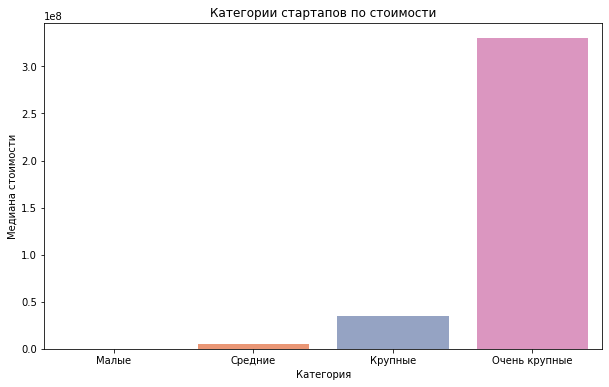

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_price_category, x = 'price_category', y = 'price_amount',
           palette='Set2')
plt.ylabel('Медиана стоимости')
plt.xlabel('Категория')
plt.title('Категории стартапов по стоимости')
plt.show()

В данных представлена информация о большом количестве компаний - порядка 40747 - с большим разбросом стоимости компаний. Оценивать типичную стоимость и выбросы сложно из-за сильного разброса данных, что демонстрируют гистограмма и диаграмма размаха. При проведении категоризации были выделены следующие группы компаний по стоимости:

- малые (до 1 млн долларов) 

- средние (1-10 млн долларов)

- крупные (10-100 млн долларов)

- очень крупные (более 100 млн долларов) 

Типичная стоимость стартапа (рассчитано по медиане) значительно отличается по категориям. Типичная стоимость очень крупных компаний составила 315 млн долл. Следующая категория - крупные компании - идет с очень большим отрывом значений, 35 млн долл. Типичная стоимость средних и малых компаний составляет 5 млн долл и 17.5 тыс долл.


### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [90]:
companies_filtered['funding_rounds'].describe()

count    40747.000000
mean         1.291531
std          1.264604
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: funding_rounds, dtype: float64

In [91]:
companies_filtered['funding_rounds'].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count    40747.000000
mean         1.291531
std          1.264604
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
95%          4.000000
99%          6.000000
max         15.000000
Name: funding_rounds, dtype: float64

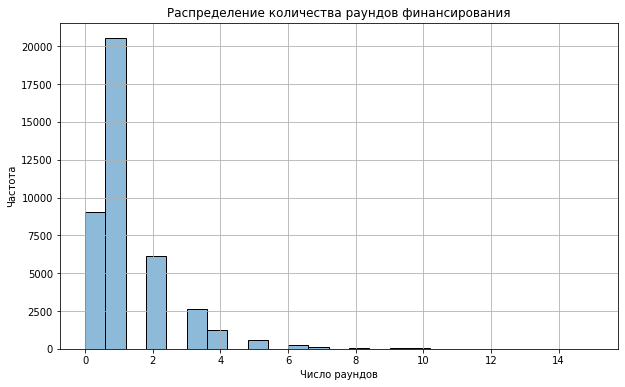

In [92]:
plt.figure(figsize=(10, 6))
sns.histplot(data=companies_filtered, x='funding_rounds', bins=25, alpha=0.5)
plt.title('Распределение количества раундов финансирования')
plt.xlabel('Число раундов')
plt.ylabel('Частота')
plt.grid()
plt.show()

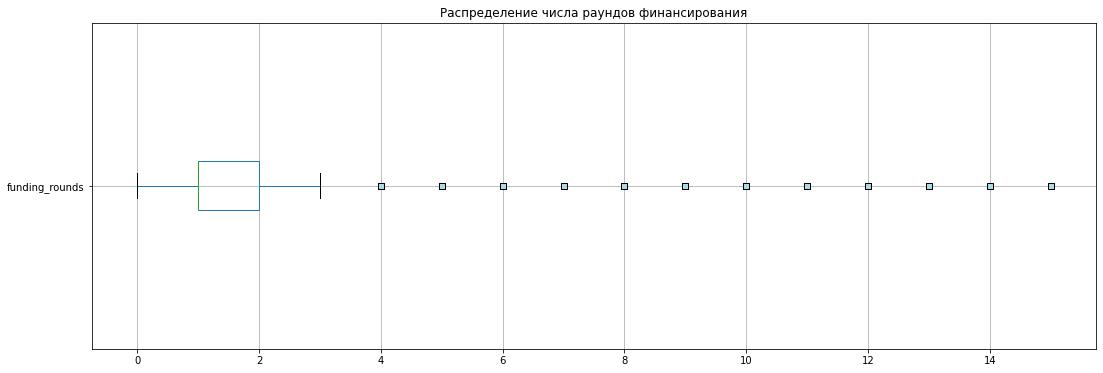

In [93]:
plt.figure(figsize=(18, 6))
boxplot = companies_filtered.boxplot(column='funding_rounds', vert=False, 
                                     showfliers=True,figsize=(10, 5),
                                     flierprops=dict(markerfacecolor='lightblue', marker='s'))

boxplot.set_title('Распределение числа раундов финансирования')

plt.show()

In [94]:
grouped_fund_rounds = companies_filtered.groupby('status').agg({'funding_rounds': 'mean'})
grouped_fund_rounds = grouped_fund_rounds.reset_index()
grouped_fund_rounds = grouped_fund_rounds.sort_values(by='funding_rounds', ascending=False)
grouped_fund_rounds['funding_rounds'] = grouped_fund_rounds['funding_rounds'].round(0)
display(grouped_fund_rounds.head())

,status,funding_rounds
2,ipo,2.0
3,operating,2.0
1,closed,1.0
0,acquired,1.0


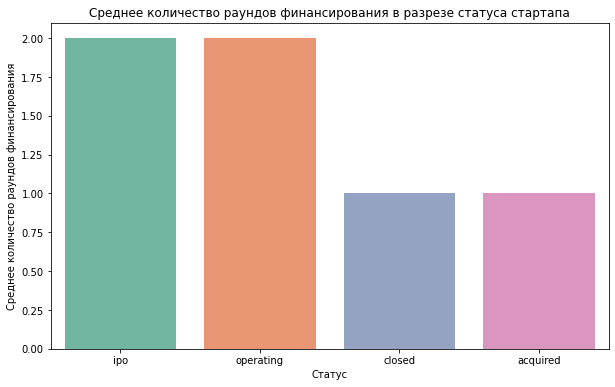

In [95]:
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_fund_rounds, x = 'status', y = 'funding_rounds',
           palette='Set2')
plt.ylabel('Среднее количество раундов финансирования')
plt.xlabel('Статус')
plt.title('Среднее количество раундов финансирования в разрезе статуса стартапа')
plt.show()

Была проанализирована информация о количестве раундов финансирования. Минимальное количество - 0 раундов, маскимальное - 15 раундов. В среднем на 1 компанию приходился 1 раунд финансирования. 99% всех компаний имели до 6 раундов финансирования. При определении среднего количества раундов финансирования в разрезе статуса стартапа выявлено, что для статусов 'ipo' и 'действующий' в среднем характерно 2 раунда финансирования, для статусов 'закрыт', 'приобретен' - 1 раунд финансирования.


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

В ходе проекта  была проведена предобработка и анализ данных о стартапах для последующего использования этих данных при покупке, развитии и перепродаже перспективных стартапов.
 
Предобработка была проведена для 7 датафреймов. Получена информация о размере датафремов, типах данных. Проведены следующие этапы предобработки:

- названия столбцов приведены к snake case, переименованы столбцы с одинаковыми названиями

- тип данных в столбцах с информацией о дате и времени преобразован в datetime64

- проверено наличие явных дубликатов

- проведен подсчет абсолютного и относительного количества пропусков.

В ходе предварительного исследования решены следующие задачи.

- Проведена оценка раундов финансирования по годам. Максимальный типичный размер средств, собранных в рамках одного раунда, отмечен для 2005 года - $5500000. 
После 2012 года наблюдалась тенденция по увеличению размера выделяемых средств и уменьшению количества раундов финансирования.

- Проведена категоризация компаний по количеству сотрудников и оценка доли сотрудников без информации об образовании. Максимальная доля сотрудников без указания образования характерна для категорий Микропредприятия (48%) и ИП(46%). 

- Установлено, что столбец network_username встречается в 3 таблицах: company_and_rounds, people, fund_extra. 

Эти столбцы содержат информацию  о разных типах ников в сети: ник компании в сети, ник сотрудника с социальных сетях и ник фонда. Таким образом, эти данные имеют различный смысл при одинаковом названии столбцов и не могут быть использованы для объединения данных. 

 
 Большое количество столбцов, дублирующиеся столбцы с идентификатором компании и большое количество пропусков делали неудобным анализ таблицы company_and_rounds. Для дальнейшей обработки датафрейм company_and_rounds разделен на два, с информацией о компаниях и раундах финансирвоания по отдельности. 

После предварительной предобработки проведена фильтрация данных для ответа на вопросы заказчика, которые касаются интересующих его компаний. 

В качестве основы для объединённой таблицы взяты только те компании, у которых указаны значения funding_rounds или investment_rounds больше нуля, или те, у которых в колонке status указано acquired. Итоговый размер основного датафрейма составил 40747 строк, 14 столбцов.

Для значений общей суммы финансирования компании рассчитаны пороги выбросов. Нижний порог значений - 0. 
Верхний порог значений составляет $ 25 250 000, значения выше этого можно считать выбросами. 

Типичный размер финансирования одной компании (медиана) составляет $ 2 500 000.


В данных представлена информация о большом количестве компаний - порядка 40747 - с большим разбросом стоимости компаний. 

Были выделены топ-5 категорий стартапов по типичной стоимости, разбросу стоимости и максимальной стоимости. 

Стартапы в области недвижимости входят в топ-5 по всем перечисленным показателям. 

К другим категориям с наибольшими медианными стоимостями стартапов входят также такие категории как: автомобильная промышленность, спорт, нанотехнологии, производство. 

Максимальный разброс стоимости стартапов характерен также для недвижимости, автомобилей, производства, а также для стартапов в области здравоохранения и полупроводников.

Максимальные цены стартапов в областях: биотехнологии, недвижимость, полупроводники, веб, программное обеспечение.

При определении среднего количества раундов финансирования в разрезе статуса стартапа выявлено, что для статусов 'ipo' и 'действующий' в среднем характерно 2 раунда финансирования, для статусов 'закрыт', 'приобретен' - 1 раунд финансирования.

В заключении можно отметить, что данные, предоставленные для исследования, очень обширны и разнообразны. Основную информацию для исследования можно получить из таблиц company_and_rounds и acquisition. Таблица company_and_rounds изначально было получена, вероятно, путем объеденения разных данных и ввиду этого содержала очень большое количество пропусков. Для перспектвиного анализа и получения информации о целесообразности приобретения стартапа таблица company_and_rounds была разделена на отдельные датафреймы companies_df и rounds_df. Основное внимание следует уделить информации о числе раундов финансирвония, сумме финансирования, стоимости компании.